# Welcome to Colab!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install opencv-python

In [9]:
import cv2
import numpy as np
import os

# If using Google Colab, mount Google Drive first
from google.colab import drive
drive.mount('/content/drive')

# List files in your directory to see what's actually there
dataset_path = "/content/drive/MyDrive/DEC-BRAINdatset"
print("Files in directory:")
print(os.listdir(dataset_path))

# Update this with the actual filename from the list above
image_path = "/content/drive/MyDrive/DEC-BRAINdatset/input_image.jpg"

# Check if file exists
if not os.path.exists(image_path):
    print(f"Error: File not found at {image_path}")
    print("Please check the filename and path.")
else:
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Could not read image file")
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (512, 512))
        rgb_image = image.astype(np.float32) / 255.0
        print("Image loaded successfully!")
        print(f"Image shape: {rgb_image.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in directory:
['Training', 'Testing', 'GradCAM_Results']
Error: File not found at /content/drive/MyDrive/DEC-BRAINdatset/input_image.jpg
Please check the filename and path.


In [10]:
import cv2
import numpy as np
import os

dataset_path = "/content/drive/MyDrive/DEC-BRAINdatset"

# Let's see what's in each folder
print("Files in Training folder:")
training_files = os.listdir(os.path.join(dataset_path, "Training"))
print(training_files[:10])  # Show first 10 files

print("\nFiles in Testing folder:")
testing_files = os.listdir(os.path.join(dataset_path, "Testing"))
print(testing_files[:10])  # Show first 10 files

# Once you see the files, choose one. For example:
# Using the first file from Testing folder as an example
image_path = os.path.join(dataset_path, "Testing", testing_files[0])

print(f"\nUsing image: {image_path}")

image = cv2.imread(image_path)

if image is None:
    print("Error: Could not read image file")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (512, 512))
    rgb_image = image.astype(np.float32) / 255.0
    print("Image loaded successfully!")
    print(f"Image shape: {rgb_image.shape}")

Files in Training folder:
['brain_mri']

Files in Testing folder:
['testing_aug_401.jpg', 'testing_aug_402.jpg', 'testing_aug_403.jpg', 'testing_aug_404.jpg', 'testing_aug_405.jpg', 'testing_aug_406.jpg', 'testing_aug_407.jpg', 'testing_aug_408.jpg', 'testing_aug_409.jpg', 'testing_aug_410.jpg']

Using image: /content/drive/MyDrive/DEC-BRAINdatset/Testing/testing_aug_401.jpg
Image loaded successfully!
Image shape: (512, 512, 3)


In [16]:
import torch
from torchvision import transforms

# Make sure device is defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

input_tensor = transform(image).unsqueeze(0).to(device)


In [18]:
import os

dataset_path = "/content/drive/MyDrive/DEC-BRAINdatset"

# Check for model files in the main directory
print("Files in main directory:")
for file in os.listdir(dataset_path):
    print(f"  {file}")

# Check for .pth, .pt, or .h5 files (common model file extensions)
print("\nSearching for model files (.pth, .pt, .h5)...")
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.pth', '.pt', '.h5', '.pkl')):
            full_path = os.path.join(root, file)
            print(f"Found: {full_path}")

Files in main directory:
  Training
  Testing
  GradCAM_Results

Searching for model files (.pth, .pt, .h5)...


In [20]:
target_layers = [model.backbone.layer4]


In [21]:
target_class = 15  # change as needed


In [23]:
# Install pytorch-grad-cam if not already installed
!pip install grad-cam

# Import necessary libraries
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import SemanticSegmentationTarget
import torch

# Define target class (0 or 1, depending on what you want to visualize)
target_class = 0  # Change this to your desired class

# Apply GradCAM
with GradCAM(
    model=model,
    target_layers=target_layers,
    use_cuda=torch.cuda.is_available()
) as cam:
    targets = [SemanticSegmentationTarget(target_class)]
    grayscale_cam = cam(
        input_tensor=input_tensor,
        targets=targets
    )[0]

print("GradCAM generated successfully!")
print(f"GradCAM shape: {grayscale_cam.shape}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=301556e4706f30641d290433cbd47760395830b6419cad6836de31fa0dde43e0
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


Exception ignored in: <function BaseCAM.__del__ at 0x7c9eb033ca40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


TypeError: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

In [25]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import torch

# Define target class (0 or 1, depending on what you want to visualize)
target_class = 0  # Change this to your desired class

# Apply GradCAM
with GradCAM(
    model=model,
    target_layers=target_layers
) as cam:
    targets = [ClassifierOutputTarget(target_class)]
    grayscale_cam = cam(
        input_tensor=input_tensor,
        targets=targets
    )[0]

print("GradCAM generated successfully!")
print(f"GradCAM shape: {grayscale_cam.shape}")

GradCAM generated successfully!
GradCAM shape: (512, 512)


In [26]:
from pytorch_grad_cam import GradCAM
import torch

# Apply GradCAM (targets=None will use the highest scoring category)
with GradCAM(
    model=model,
    target_layers=target_layers
) as cam:
    grayscale_cam = cam(
        input_tensor=input_tensor,
        targets=None  # Uses predicted class
    )[0]

print("GradCAM generated successfully!")
print(f"GradCAM shape: {grayscale_cam.shape}")

GradCAM generated successfully!
GradCAM shape: (512, 512)


In [27]:
cam_image = show_cam_on_image(
    rgb_image,
    grayscale_cam,
    use_rgb=True
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(rgb_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(cam_image)
plt.axis("off")

plt.show()


NameError: name 'show_cam_on_image' is not defined

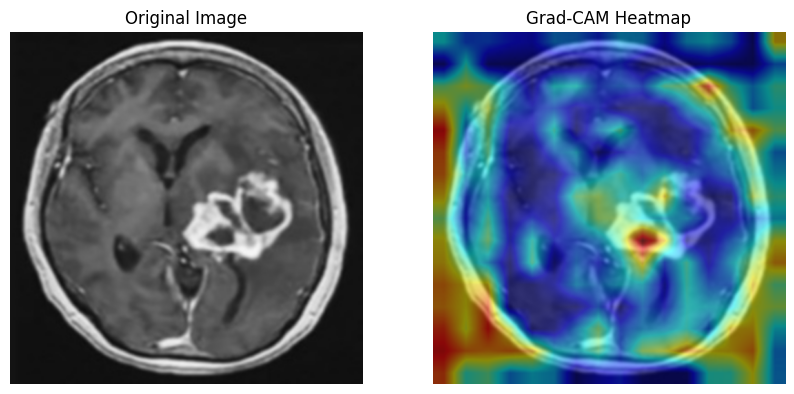

In [28]:
from pytorch_grad_cam.utils.image import show_cam_on_image
import matplotlib.pyplot as plt

cam_image = show_cam_on_image(
    rgb_image,
    grayscale_cam,
    use_rgb=True
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(rgb_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(cam_image)
plt.axis("off")

plt.show()

In [29]:
from scipy.ndimage import gaussian_filter


In [30]:
# Step 1: Apply Gaussian smoothing
sigma = 6  # Higher = more smoothing
smoothed_cam = gaussian_filter(grayscale_cam, sigma=sigma)

# Step 2: Normalize heatmap
smoothed_cam -= smoothed_cam.min()
smoothed_cam /= (smoothed_cam.max() + 1e-8)

# Step 3: Apply advanced colormap (TURBO / INFERNO / MAGMA)
heatmap = plt.get_cmap("turbo")(smoothed_cam)[:, :, :3]

# Step 4: Overlay with alpha blending
alpha = 0.5
advanced_cam = (1 - alpha) * rgb_image + alpha * heatmap
advanced_cam = np.clip(advanced_cam, 0, 1)


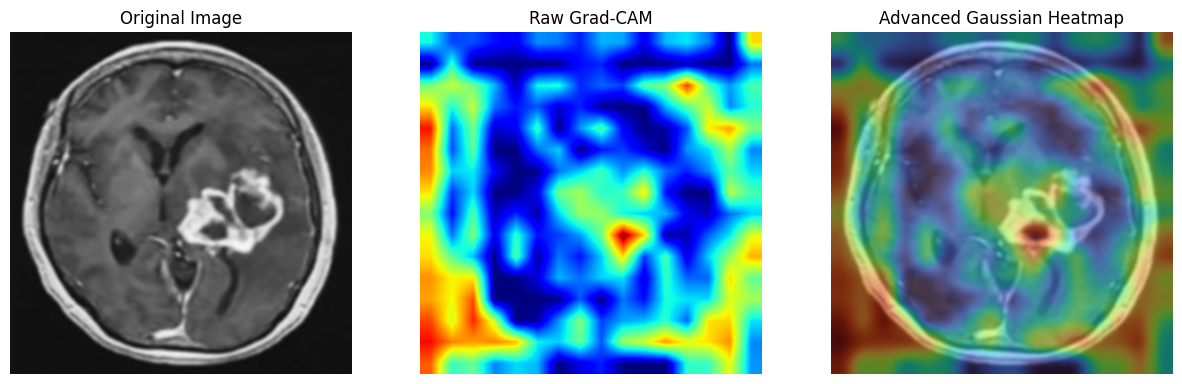

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(rgb_image)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Raw Grad-CAM")
plt.imshow(grayscale_cam, cmap="jet")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Advanced Gaussian Heatmap")
plt.imshow(advanced_cam)
plt.axis("off")

plt.show()


In [32]:
advanced_cam[smoothed_cam < 0.3] = rgb_image[smoothed_cam < 0.3]


In [33]:
plt.imsave("gaussian_gradcam.png", advanced_cam)


In [34]:
sigma = 3
alpha = 0.7


In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


In [36]:
# Adaptive Gaussian smoothing
sigma = max(2, int(0.02 * grayscale_cam.shape[0]))

cam_smooth = gaussian_filter(grayscale_cam, sigma=sigma)


In [37]:
# Robust normalization using percentiles
p_low, p_high = np.percentile(cam_smooth, (2, 98))
cam_norm = np.clip((cam_smooth - p_low) / (p_high - p_low + 1e-8), 0, 1)


In [38]:
# Emphasize confident regions
gamma = 1.4
cam_gamma = cam_norm ** gamma


In [39]:
colormap = plt.get_cmap("magma")
heatmap = colormap(cam_gamma)[..., :3]


In [40]:
# Convert RGB image to float
img_float = rgb_image.astype(np.float32)

# Create soft mask
mask = cam_gamma[..., None]

# Blend heatmap with original image
alpha = 0.65
overlay = img_float * (1 - mask * alpha) + heatmap * (mask * alpha)
overlay = np.clip(overlay, 0, 1)


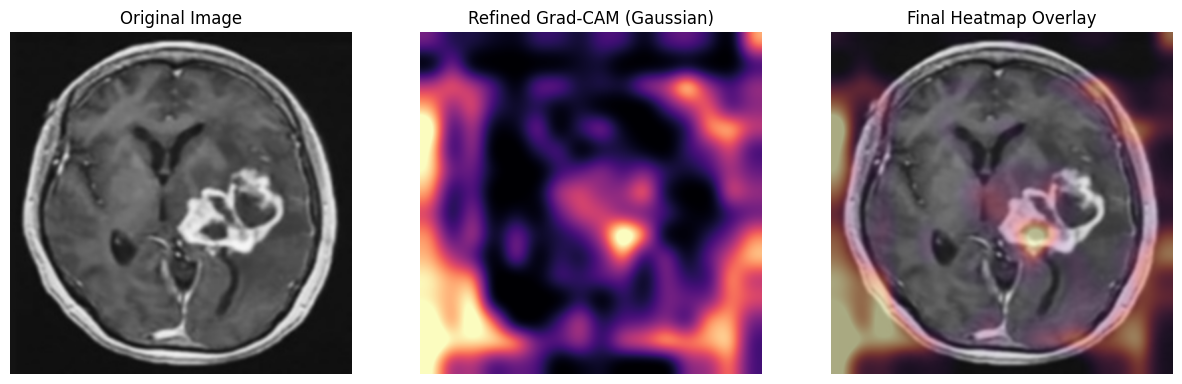

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(rgb_image)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Refined Grad-CAM (Gaussian)")
plt.imshow(cam_gamma, cmap="magma")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Final Heatmap Overlay")
plt.imshow(overlay)
plt.axis("off")

plt.show()


In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


In [43]:
def multiscale_cam(cam, scales=(2, 5, 10), weights=(0.2, 0.3, 0.5)):
    assert len(scales) == len(weights)

    cam_ms = np.zeros_like(cam, dtype=np.float32)

    for sigma, w in zip(scales, weights):
        cam_ms += w * gaussian_filter(cam, sigma=sigma)

    return cam_ms


In [44]:
# Apply scale-aware smoothing
cam_scaled = multiscale_cam(
    grayscale_cam,
    scales=(2, 6, 12),     # fine → medium → coarse
    weights=(0.25, 0.35, 0.40)
)


In [45]:
# Percentile-based normalization (scale invariant)
p1, p99 = np.percentile(cam_scaled, (1, 99))
cam_norm = np.clip((cam_scaled - p1) / (p99 - p1 + 1e-8), 0, 1)


In [46]:
# Enhance local vs global response
gamma = 1.3
cam_scaled = cam_norm ** gamma


In [47]:
colormap = plt.get_cmap("turbo")
heatmap = colormap(cam_scaled)[..., :3]


In [48]:
img = rgb_image.astype(np.float32)

# Scale-aware blending mask
mask = cam_scaled[..., None]

alpha = 0.65
overlay = img * (1 - alpha * mask) + heatmap * (alpha * mask)
overlay = np.clip(overlay, 0, 1)


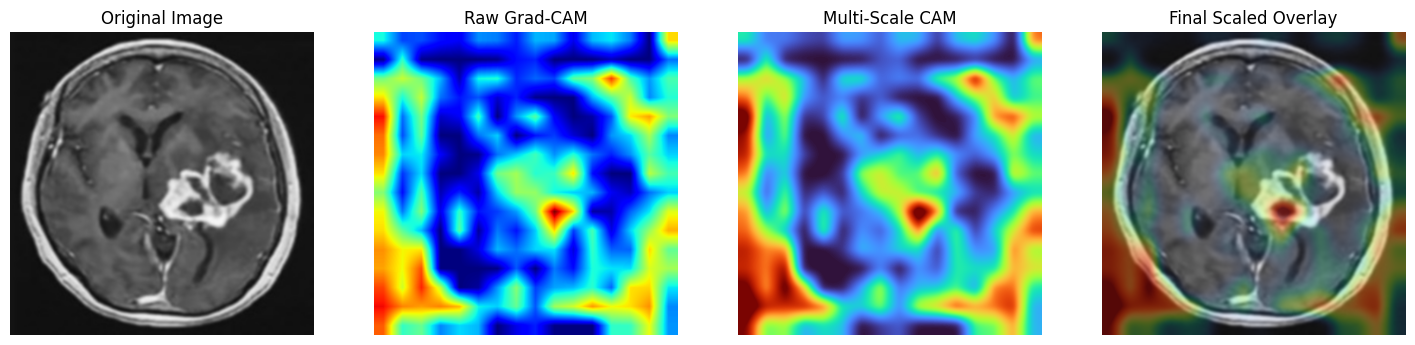

In [49]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(rgb_image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Raw Grad-CAM")
plt.imshow(grayscale_cam, cmap="jet")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Multi-Scale CAM")
plt.imshow(cam_scaled, cmap="turbo")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Final Scaled Overlay")
plt.imshow(overlay)
plt.axis("off")

plt.show()
